**Python’s SQLite API**

Python has an extensive libray of modules and methods allow you to manage data. SQL is one of the most efficient languges when it comes to working with relation databases. Lukily, python hods this function to combine the two to increase the functionability with relational database. In this atticle will explore the sqlite3 module, which allows to create, read, update and delete the data in our SQlite relationala database.

**01 Connecting to SQLite in Python**

 With sqlite3 module, we simply import the module like we would with any other.

In [3]:
import sqlite3

**1.1 Connect to database**

Once we have sqlite imported, we'll need to connect to the database, and we can do that with pre-existing database sqlite3.connect() API.With this method we want to connect Python and SQLite to comunicate with one to another. 
We can imagine our connection object as a cable that connects our python enviroment to our SQLite database.
With that line we have established a connection to the SQLite database first.db.
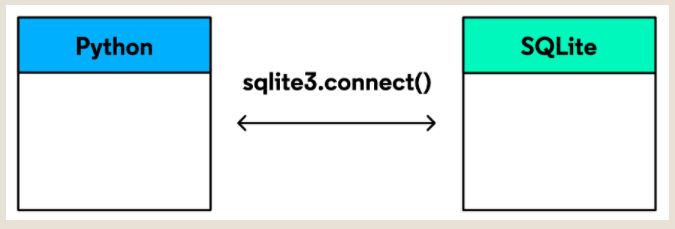

In [13]:
connection = sqlite3.connect("student_v01.db")

**1.2 Call statements to our SQLite**

We need a way to call SQL statements on the data within the database.A cursor object represents a database cursor, and can be used to call statements to our SQLite database, and return the data in our python environment. If we imagine the connection object as a cable that connects Python to SQLite, the cursor would use the cable to move back and forth to send messages and exchange data between the two.
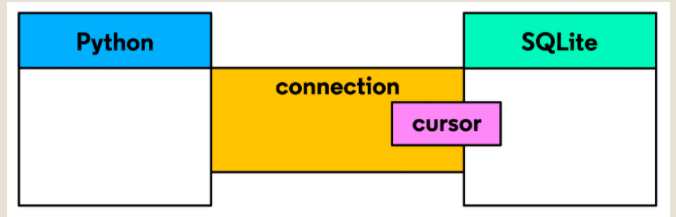
Remember that SQLite databases are relational databases, which are composed of tables related to one another. So far, our database is empty

In [14]:
# create the cursor object 
cursor = connection.cursor()

**02 Executing SQL Statements in Python**

When working with relational database and we want to create a table within our database, we need to execute a SQL statement. Our cursor object is able to execute these statements with its execute() method. 
    - we are using a triple quoted string to make a multi-line string
    - to create a table we need to define the fields(columns), keys and fields types

In [15]:
# method execute() to create a table
cursor.execute('''CREATE TABLE students_v01 (
                    id INTEGER PRIMARY KEY,
                    name TEXT NOT NULL,
                    email TEXT NOT NULL UNIQUE,
                    major_code INTEGER,
                    grad_date datetime,
                    grade REAL NOT NULL)''')

**2.1 Insert data and commit changes**

We can insert data with the INSERT clause. For one row of data, we can use execute() method like so, to insert multiples values at once we can use the executemany() method, a variation of the execute method which allows us to execute multiple commands in a single API call. 
- we use 6 questions marks as placeholders to represent each of the fields in the database that we will insert values into
- we need to ensure that the changes will be visible to others, to do that we have to use commit() method on our connection to make sure that changes are committed


In [16]:
# insert one row
cursor.execute('''INSERT INTO students_v01 VALUES (101, 'Alex', 'alex@codeu.com', 32, '2022-05-16', 'Pass')''')

In [65]:
# insert multiple values 
students = [(102, 'Joe', 'joseph@codeu.com', 32, '2022-05-16', 'Pass'),
            (103, 'Stacy', 'stacy@codeu.com', 10, '2022-05-16', 'Pass'),
            (104, 'Angela', 'angela@codeu.com', 21, '2022-12-20', 'Pass'),
            (105, 'Mark', 'mark@codeu.com', 21, '2022-12-20', 'Fail'),
            (106, 'Nathan', 'nathaniel@codeu.com', 21, '2022-12-20', 'Pass')
            ]
cursor.executemany('''INSERT INTO students_v01 VALUES(?,?,?,?,?,?)''', students)
# commit changes to the database
connection.commit()

OperationalError: no such table: students_v01

**03. Reading our SQL data with Python**

To read the data within our database, we can use multiple methods. The most simple is to use a for loop that iterates through our database and calls some SQL statement:
- there are also other methods to retrieve data 
    - fetchone() ; return the first row that fulfils a query
    - fetchmany() ; return a specific number of rows from our database that coresponds with a particular querry 
    - fetchall() ; returns all rows associated with a certain SQL statement 
    
!!! Notice that using for loops and the fetchone() method return tuples, while fetchmany() and fetchall() return lists of tuples.

In [20]:
# Iterate through all rows in students table
for row in cursor.execute('SELECT * FROM students_v01'):
    print(row)

(101, 'Alex', 'alex@codeu.com', 32, '2022-05-16', 'Pass')
(102, 'Joe', 'joseph@codeu.com', 32, '2022-05-16', 'Pass')
(103, 'Stacy', 'stacy@codeu.com', 10, '2022-05-16', 'Pass')
(104, 'Angela', 'angela@codeu.com', 21, '2022-12-20', 'Pass')
(105, 'Mark', 'mark@codeu.com', 21, '2022-12-20', 'Fail')
(106, 'Nathan', 'nathaniel@codeu.com', 21, '2022-12-20', 'Pass')


In [22]:
# Return first row in students
cursor.execute("SELECT * FROM students_v01").fetchone()

(101, 'Alex', 'alex@codeu.com', 32, '2022-05-16', 'Pass')

In [23]:
# Return first three rows in students
cursor.execute("SELECT * FROM students_v01").fetchmany(3)

[(101, 'Alex', 'alex@codeu.com', 32, '2022-05-16', 'Pass'),
 (102, 'Joe', 'joseph@codeu.com', 32, '2022-05-16', 'Pass'),
 (103, 'Stacy', 'stacy@codeu.com', 10, '2022-05-16', 'Pass')]

In [24]:
# Return all rows in students
cursor.execute("SELECT * FROM students_v01").fetchall()

[(101, 'Alex', 'alex@codeu.com', 32, '2022-05-16', 'Pass'),
 (102, 'Joe', 'joseph@codeu.com', 32, '2022-05-16', 'Pass'),
 (103, 'Stacy', 'stacy@codeu.com', 10, '2022-05-16', 'Pass'),
 (104, 'Angela', 'angela@codeu.com', 21, '2022-12-20', 'Pass'),
 (105, 'Mark', 'mark@codeu.com', 21, '2022-12-20', 'Fail'),
 (106, 'Nathan', 'nathaniel@codeu.com', 21, '2022-12-20', 'Pass')]

**SQLIte syntax and Python**

- using other clasue like WHERE and COUNT 
- let's say that you would like to use to find the average, we can use Pythom methods sum() and len()

In [26]:
# Return the number of rows with a passing grade
cursor.execute("""SELECT COUNT(*) FROM students_v01 WHERE Grade = 'Pass';""").fetchone()

(5,)

In [27]:
# Create a list of tuples of the major codes
major_codes = cursor.execute("SELECT major_code FROM students_v01;").fetchall()
 
# Obtain the average of the tuple list by using for loops
sum = 0
for num in major_codes: 
    for i in num: 
        sum = sum + i 
average = sum / len(major_codes)
 
# Show average
print(average)

22.833333333333332


**SQLite with Pandas**

Let's use Pandas to transform our SQLite database into a pandas dataframe. 

How it works?
- first import pandas into python, then call the Pandas read_sql_query() method, that takes in a query and a connection as parameters and returns a dataframe 
- we can customize the dataframes based on any query, we can filter only specific rows by using WHERE clause 

In [30]:
# Create a new dataframe from the result set
import pandas as pd
df = pd.read_sql_query('''SELECT * from students_v01;''', connection)
 
# Show new dataframe
df.head()

,id,name,email,major_code,grad_date,grade
0,101,Alex,alex@codeu.com,32,2022-05-16,Pass
1,102,Joe,joseph@codeu.com,32,2022-05-16,Pass
2,103,Stacy,stacy@codeu.com,10,2022-05-16,Pass
3,104,Angela,angela@codeu.com,21,2022-12-20,Pass
4,105,Mark,mark@codeu.com,21,2022-12-20,Fail


In [32]:
# Create a new dataframe from the result set
df = pd.read_sql_query('''SELECT * from students_v01 WHERE major_code = 21;''', connection)
 
# Show new dataframe
df

,id,name,email,major_code,grad_date,grade
0,104,Angela,angela@codeu.com,21,2022-12-20,Pass
1,105,Mark,mark@codeu.com,21,2022-12-20,Fail
2,106,Nathan,nathaniel@codeu.com,21,2022-12-20,Pass


**Code Challenge**
- Below we can see the code that we would use to import the dataset from the internet as a Pandas dataframe, then converting it to a SQLite database with the Pandas df_to_sql() method.


In [51]:
# Import pandas with alias
import pandas as pd
 
# Use read_csv to read in data as a pandas dataframe
df = pd.read_csv("insurance.csv")
 
# Show DataFrame
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [67]:
# Import sqlite3
import sqlite3
 
# Instantiate a connection
connection = sqlite3.connect("insurance.db")
 
# Instantiate a cursor
cursor = connection.cursor()
 
# Create a table
df_to_sql = df.to_sql("insurance_v01", connection)
connection.execute('''SELECT * FROM insurance_v01;''').fetchall()

**Review**
1. Return the five rows of the insurance table as a variable named first_five 

2. Return the passanger that were 50 years old and set it equal to a variable called fifties 

3. Return the number of female passengers as a variable named femme.

4. Use the Pandas read_sql_querry() method to revert the titanic table back into a Pandas DataFrame called new_df 

In [37]:
# Import sqlite3
import sqlite3

# Instantiate a connection
connection = sqlite3.connect('titanic.db')

# Instantiate a cursor
cursor = connection.cursor()

#Create a five rows object 
five_rows = cursor.execute("SELECT * FROM titanic").fetchmany(5)
five_rows

[(0, 19, 'female', 27.9, 0, 'yes', 'southwest', 16884.924),
 (1, 18, 'male', 33.77, 1, 'no', 'southeast', 1725.5523),
 (2, 28, 'male', 33.0, 3, 'no', 'southeast', 4449.462),
 (3, 33, 'male', 22.705, 0, 'no', 'northwest', 21984.47061),
 (4, 32, 'male', 28.88, 0, 'no', 'northwest', 3866.8552)]

In [43]:
# import sqlite3
import sqlite3

#instantiate a connection
connection = sqlite3.connect('titanic.db')

#instantiate a cursor 
cursor = connection.cursor()

# create fifties object 
fifties = cursor.execute("SELECT * FROM titanic WHERE age = 50;").fetchall()

In [44]:
# Import sqlite3
import sqlite3

# Instantiate a connection
connection = sqlite3.connect("titanic.db")

# Instantiate a cursor
cursor = connection.cursor()

# Create femme object
femme = cursor.execute('''SELECT COUNT(*) FROM titanic WHERE Sex == 'female';''').fetchone()

# Print femme object
femme

(662,)

In [45]:
import pandas as pd 
import sqlite3

#instantiate a connection 
connection = sqlite3.connect("titanic.db")

#instantiate a cursor 
cursor = connection.cursor()

#create new_df object 
new_df = pd.read_sql_query('''SELECT * FROM titanic''', connection)

# display new dataframe 
new_df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
